In [3]:
import tensorflow as tf

#load the datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#pre-process the data 
x_train = tf.keras.utils.normalize(x_train, axis=1) 
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [13]:
#define the model input and set the layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.sigmoid))

In [14]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0518 - accuracy: 0.2489
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8665 - accuracy: 0.3308
Epoch 3/100
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7763 - accuracy: 0.3670
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7220 - accuracy: 0.3851
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6738 - accuracy: 0.4045
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6351 - accuracy: 0.4158
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6004 - accuracy: 0.4314
Epoch 8/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5682 - accuracy: 0.4414
Epoch 9/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5413 - accuracy: 0.4533
Epoch 10/100
1563/1563 [==============================] - 8s 5ms/step - l

In [19]:
#evaluate the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

#make predictions
predictions = model.predict(x_test)


313/313 [==============================] - 2s 5ms/step - loss: 2.2531 - accuracy: 0.4640
2.2531487941741943
0.46399998664855957
313/313 [==============================] - 1s 4ms/step


1/1 [==============================] - 0s 19ms/step


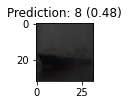

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Select 5 random images from the test set
indices = np.random.randint(0, len(x_test), size=1)
images = x_test[indices]

# Make predictions for the selected images
predictions = model.predict(images)

# Iterate over the images and predictions
for i, (image, prediction) in enumerate(zip(images, predictions)):
  # Convert the image to uint8 and reshape it to (32, 32, 3)
  image = np.uint8(image * 255).reshape(32, 32, 3)

  # Get the class label and probability
  label = np.argmax(prediction)
  probability = prediction[label]

  # Plot the image and the prediction
  plt.subplot(1, 5, i + 1)
  plt.imshow(image)

  
# The labels of the CIFAR-10 dataset are represented as integers in the range 0 to 9. Each integer corresponds to a class of image:

# 0: airplane
# 1: automobile
# 2: bird
# 3: cat
# 4: deer
# 5: dog
# 6: frog
# 7: horse
# 8: ship
# 9: truck

  plt.title("Prediction: {} ({:.2f})".format(label, probability))

plt.show()


In [59]:
! pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: 
Add token as git credential? (Y/n) n
Token is valid.
Your token has been saved to /root/.huggingface/token
Login successful


In [63]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


In [64]:
from huggingface_hub import create_repo
create_repo(repo_id="test-model")
'https://huggingface.co/zegoop/myModel1'

'https://huggingface.co/zegoop/myModel1'

In [65]:
from huggingface_hub import upload_file
upload_file(
   path_or_fileobj="Cat&Dogs.ipynb", 
   path_in_repo="cat&dog.ipynb", 
   repo_id="zegoop/myModel1"
)
'https://huggingface.co/zegoop/myModel1/blob/main/cat&dog.ipynb'

ValueError: ignored